# Projeto Slot 4 - Setor De Varejo

Case: WALMART,

Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. 
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. 
No ano de 2021, obteve um um lucro de $13.51 Bilhões.
Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. 
O Walmart realiza vários eventos promocionais de descontos ao longo do ano. 
Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. 
As semanas que incluem esses feriados têm um peso maior.


# O que devo fazer? 

A empresa te contratou para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. 

Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema.

Também é importante ressaltar/explicar passagens complexas ou insights que você tiver durante a resolução desse projeto.


# Descrição do projeto

O Projeto de Insight cobre 5 questionamentos basicamente (Que você estabelecer):

* A Questão de Negócio:
  - Qual a minha meta?
  - Como posso chegar?

* O Entendimento do Negócio:
  - Quais dados eu tenho disponível?
  - Eles são relevantes para o problema?
  - Eles me trazem uma solução direta?
  - Qual o meu setor ou range de negócio?

* A Coleta de Dados:
  - Os dados que eu tenho fazem sentido?
  - Estão no formato que eu gostaria?
  - O que mais eu consigo obter de informação destes dados?

* A Limpeza de Dados:
  - Remoção de dados outliers e valores ausentes
  - Data
  
* A Exploração de Dados:
  - Visualização dos dados
  - Quais as minhas métricas essenciais
  - Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.


Baseado nestes pensamentos que você utilizou para responder as perguntas acima, qual seria os 5 imóveis que você compraria e o porquê e quais 5 você não compraria de jeito nenhum.

# Dicas de insights:
1.	Qual o preço médio de venda semanal por loja?
2.	Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)
3.	Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4.	Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5.	Pensando na expansão de uma das lojas, que loja você escolheria e o por que?


## Sobre os Dados

<br>
Dataset: [https://www.kaggle.com/yasserh/walmart-dataset]
<br>


Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

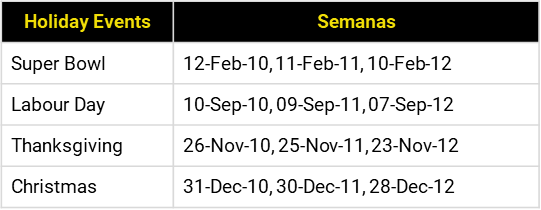
<br>

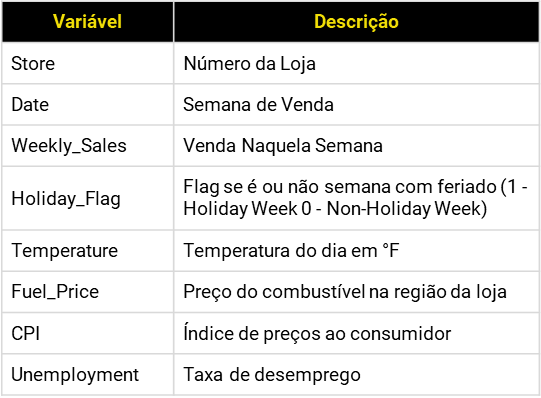

# Biblicotecas Utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objs import *
import plotly.express as px

#Importação dos dados e análises inicias

In [2]:
# Leitura dos dados
df = pd.read_csv('/content/drive/MyDrive/Walmart.csv',sep=',')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Mostrando o tamanho de colunas e linha da tabela
df.shape

(6435, 8)

In [5]:
# Descobrindo a quantidade de lojas 
len(df.Store.unique())

45

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    6435
dtype: int64

In [8]:
# Vizualizando quantas linhas no dataset para cada loja
df.Store.value_counts().sort_index() [:10]

1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
Name: Store, dtype: int64

In [9]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [10]:
df.Unemployment.value_counts()

8.099    78
8.163    56
7.852    56
8.200    52
6.565    52
         ..
7.138     4
8.665     4
8.000     4
9.151     4
5.217     4
Name: Unemployment, Length: 349, dtype: int64

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
df[df['Unemployment'] == 8.106]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11
5,1,12-03-2010,"1,439,541.59",0,57.79,2.67,211.38,8.11
6,1,19-03-2010,"1,472,515.79",0,54.58,2.72,211.22,8.11
7,1,26-03-2010,"1,404,429.92",0,51.45,2.73,211.02,8.11


## Formatação e enriquecimento dos dados


In [13]:
#Conversão da Coluna de Data de 'object' para data
df['Date'] = pd.to_datetime(df['Date'])
df['Year']  = df['Date'].dt.year #criação das colunas ano e mês
df['Month'] = df['Date'].dt.month

# Limpeza dos Dados

In [14]:
filtro_df = df[['Store',	'Weekly_Sales',	'Holiday_Flag',	'Temperature',	'Fuel_Price',	'CPI',	'Unemployment']]
filtro_df.describe(percentiles=[0.95,0.975,0.99, 0.995])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,60.66,3.36,171.58,8.00
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88
min,1.00,"209,986.25",0.00,-2.06,2.47,126.06,3.88
50%,23.00,"960,746.04",0.00,62.67,3.44,182.62,7.87
95%,43.00,"2,049,178.51",1.00,87.66,4.03,221.93,12.19
97.5%,44.00,"2,168,049.94",1.00,90.37,4.13,223.90,13.97
99%,45.00,"2,404,035.30",1.00,93.19,4.20,225.47,14.18
99.5%,45.00,"2,733,137.77",1.00,95.61,4.29,225.96,14.31
max,45.00,"3,818,686.45",1.00,100.14,4.47,227.23,14.31


In [15]:
describe_df = filtro_df.describe(percentiles=[0.995])
dic_lim = describe_df
dic_lim

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,60.66,3.36,171.58,8.00
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88
min,1.00,"209,986.25",0.00,-2.06,2.47,126.06,3.88
50%,23.00,"960,746.04",0.00,62.67,3.44,182.62,7.87
99.5%,45.00,"2,733,137.77",1.00,95.61,4.29,225.96,14.31
max,45.00,"3,818,686.45",1.00,100.14,4.47,227.23,14.31


In [16]:
df_clean = df.copy()
for i in dic_lim.columns:
  df_clean = df_clean[df_clean[i] <= dic_lim.loc['99.5%',i]]
df_clean.reset_index(drop=True,inplace = True)
df_clean.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,"6,305.00","6,305.00","6,305.00","6,305.00","6,305.00","6,305.00","6,305.00","6,305.00","6,305.00"
mean,23.07,"1,041,349.18",0.07,60.47,3.35,171.79,8.00,"2,010.96",6.43
std,12.99,"545,430.14",0.25,18.32,0.46,39.23,1.86,0.79,3.31
min,1.00,"209,986.25",0.00,-2.06,2.47,126.06,3.88,"2,010.00",1.00
25%,12.00,"556,015.59",0.00,47.34,2.92,131.98,6.90,"2,010.00",4.00
50%,23.00,"961,186.23",0.00,62.49,3.44,182.90,7.87,"2,011.00",6.00
75%,34.00,"1,417,922.37",0.00,74.78,3.73,212.74,8.60,"2,012.00",9.00
max,45.00,"2,727,575.18",1.00,95.61,4.28,225.94,14.31,"2,012.00",12.00


In [17]:
#Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)
df_clean.corr()['Weekly_Sales'].abs().sort_values(ascending = False)

Weekly_Sales   1.00
Store          0.33
Unemployment   0.11
CPI            0.07
Month          0.04
Temperature    0.03
Fuel_Price     0.03
Holiday_Flag   0.03
Year           0.00
Name: Weekly_Sales, dtype: float64

In [18]:
df_clean.shape

(6305, 10)

In [19]:
df_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,5


# Visualizando as métricas estatísticas 

#Visualizando as Métricas

In [20]:
df_clean[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,"6,305.00","6,305.00","6,305.00","6,305.00","6,305.00"
mean,"1,041,349.18",60.47,3.35,171.79,8.00
std,"545,430.14",18.32,0.46,39.23,1.86
min,"209,986.25",-2.06,2.47,126.06,3.88
25%,"556,015.59",47.34,2.92,131.98,6.90
50%,"961,186.23",62.49,3.44,182.90,7.87
75%,"1,417,922.37",74.78,3.73,212.74,8.60
max,"2,727,575.18",95.61,4.28,225.94,14.31


In [21]:
vendas_total = df_clean['Weekly_Sales'].sum()
print(f'U$ {vendas_total:,.2f}')

U$ 6,565,706,579.33


In [22]:
#Média de Vendas Semanais por loja
vendas_sem = df_clean.groupby(['Store'])[['Weekly_Sales']].mean().reset_index().sort_values('Weekly_Sales', ascending=False)
vendas_sem.rename(columns={'Weekly_Sales': 'Média_Vendas'}, inplace = True)
vendas_sem [:10]

,Store,Média_Vendas
19,20,"2,058,998.05"
3,4,"2,051,352.01"
13,14,"1,986,529.39"
12,13,"1,957,682.27"
1,2,"1,905,830.24"
9,10,"1,856,344.19"
26,27,"1,759,139.96"
5,6,"1,564,728.19"
0,1,"1,555,264.40"
38,39,"1,450,668.13"


In [23]:
# Loja que teve mais venda no período
df_sorts = df_clean[['Store', 'Weekly_Sales']].groupby(['Store']).agg('sum').reset_index().sort_values(by='Weekly_Sales', ascending=False)
df_sorts.rename(columns = {'Weekly_Sales': 'Soma_Vendas'}, inplace = True)
df_sorts.head(10)

,Store,Soma_Vendas
3,4,"281,035,224.92"
19,20,"280,023,734.81"
13,14,"276,127,584.78"
1,2,"268,722,063.50"
12,13,"268,202,470.39"
26,27,"248,038,735.05"
9,10,"245,037,433.62"
5,6,"223,756,130.64"
0,1,"222,402,808.85"
38,39,"207,445,542.47"


In [24]:
#Juntando as Colunas de Média e Soma em um Dataframe.
lojas_top10 = vendas_sem.merge(df_sorts, how='left', on='Store').head(10)
lojas_top10


,Store,Média_Vendas,Soma_Vendas
0,20,"2,058,998.05","280,023,734.81"
1,4,"2,051,352.01","281,035,224.92"
2,14,"1,986,529.39","276,127,584.78"
3,13,"1,957,682.27","268,202,470.39"
4,2,"1,905,830.24","268,722,063.50"
5,10,"1,856,344.19","245,037,433.62"
6,27,"1,759,139.96","248,038,735.05"
7,6,"1,564,728.19","223,756,130.64"
8,1,"1,555,264.40","222,402,808.85"
9,39,"1,450,668.13","207,445,542.47"


In [52]:
#Encontrando a loja com melhor resultado
df_maiorloja = df_clean[df_clean['Store']==4].reset_index()
media_loja4 = df_maiorloja.Weekly_Sales.mean()

In [53]:
# Número de semanas acima da média do período
df_maiorloja[df_maiorloja['Weekly_Sales']>media_loja4].count()

index           71
Store           71
Date            71
Weekly_Sales    71
Holiday_Flag    71
Temperature     71
Fuel_Price      71
CPI             71
Unemployment    71
Year            71
Month           71
dtype: int64

In [27]:
media_sem = df_clean['Weekly_Sales'].mean()
print(f'U$ {media_sem:,.2f}')

U$ 1,041,349.18


In [28]:
max_sem = df_clean.Weekly_Sales.max()
print(f'U$ {max_sem:,.2f}')

U$ 2,727,575.18


In [29]:
min_sem = df_clean.Weekly_Sales.min()
print(f'U$ {min_sem:,.2f}')

U$ 209,986.25


In [30]:
median_sem = df_clean.Weekly_Sales.median()
print(f'U$ {median_sem:,.2f}')

U$ 961,186.23


In [31]:
faturamento_total = df_clean.groupby(['Store']).agg('sum')
grafico = px.bar(faturamento_total, 
                 y='Weekly_Sales'
                 )


grafico.update_layout(
    title='Total de Faturamento/Loja',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Loja',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Vendas Semanais',
        titlefont_size=16,
        tickfont_size=14))


grafico.show()

In [72]:
faturamento_medio = df_clean.groupby(['Store']).mean()
faturamento_medio.head()


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Store,,,,,,,,
1,"1,555,264.40",0.07,68.31,3.22,216.00,7.61,"2,010.97",6.48
2,"1,905,830.24",0.07,68.50,3.22,215.66,7.62,"2,010.97",6.40
3,"402,091.88",0.07,71.19,3.19,218.97,7.24,"2,010.90",6.33
4,"2,051,352.01",0.06,63.10,3.23,128.69,5.96,"2,010.99",6.25
5,"318,011.81",0.07,69.41,3.22,216.57,6.30,"2,010.97",6.48


In [67]:
# Vendas semanais / Médio por loja

grafico = px.histogram(df_clean,
                 y='Weekly_Sales', 
                 x='Store', 
                 color='Holiday_Flag',
                 barmode = 'group',
                 histfunc='avg'
                  )
grafico.add_hline(y=media_sem, 
                  line_color="green",
                  annotation_text="Média de Vendas Período",
                  )

grafico.add_hline(y=max_sem, 
                  line_color="yellow",
                  annotation_text="Máximo de Vendas Período"
                  )

grafico.add_hline(y=min_sem, 
                  line_color="red",
                  annotation_text="Mínimo de Vendas Período"
                  )

grafico.update_layout(
    title='Média Faturamento/mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Loja',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Vendas Semanais',
        titlefont_size=16,
        tickfont_size=14))


grafico.show()

In [33]:
acima_lojas = faturamento_medio[faturamento_medio['Weekly_Sales']>media_sem].sort_values('Weekly_Sales', ascending=False)
acima_lojas [:10]

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Store,,,,,,,,
20,"2,058,998.05",0.06,56.51,3.43,209.10,7.37,"2,010.99",6.22
4,"2,051,352.01",0.06,63.10,3.23,128.69,5.96,"2,010.99",6.25
14,"1,986,529.39",0.06,58.38,3.42,186.35,8.65,"2,010.99",6.32
13,"1,957,682.27",0.06,54.66,3.30,128.69,7.00,"2,010.99",6.25
2,"1,905,830.24",0.07,68.50,3.22,215.66,7.62,"2,010.97",6.40
10,"1,856,344.19",0.06,72.89,3.55,128.59,8.41,"2,010.94",6.25
27,"1,759,139.96",0.07,57.61,3.58,139.02,8.00,"2,010.97",6.40
6,"1,564,728.19",0.07,69.70,3.22,217.55,6.61,"2,010.97",6.48
1,"1,555,264.40",0.07,68.31,3.22,216.00,7.61,"2,010.97",6.48


In [34]:
# Qtd de lojas que ficaram acima da média de vendas com base em todas as outras lojas.
len(acima_lojas)

19

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
1635,12,2012-11-05,"1,041,995.22",0,77.27,4.19,131.15,11.63,2012,11
3124,23,2011-11-03,"1,042,043.55",0,29.36,3.60,133.74,5.11,2011,11
3527,26,2010-10-09,"1,042,226.30",1,54.82,2.72,132.76,8.45,2010,10
2996,22,2011-06-17,"1,042,454.61",0,63.97,3.87,139.00,8.25,2011,6
1534,12,2010-07-05,"1,043,240.27",0,70.15,3.13,126.29,14.10,2010,7


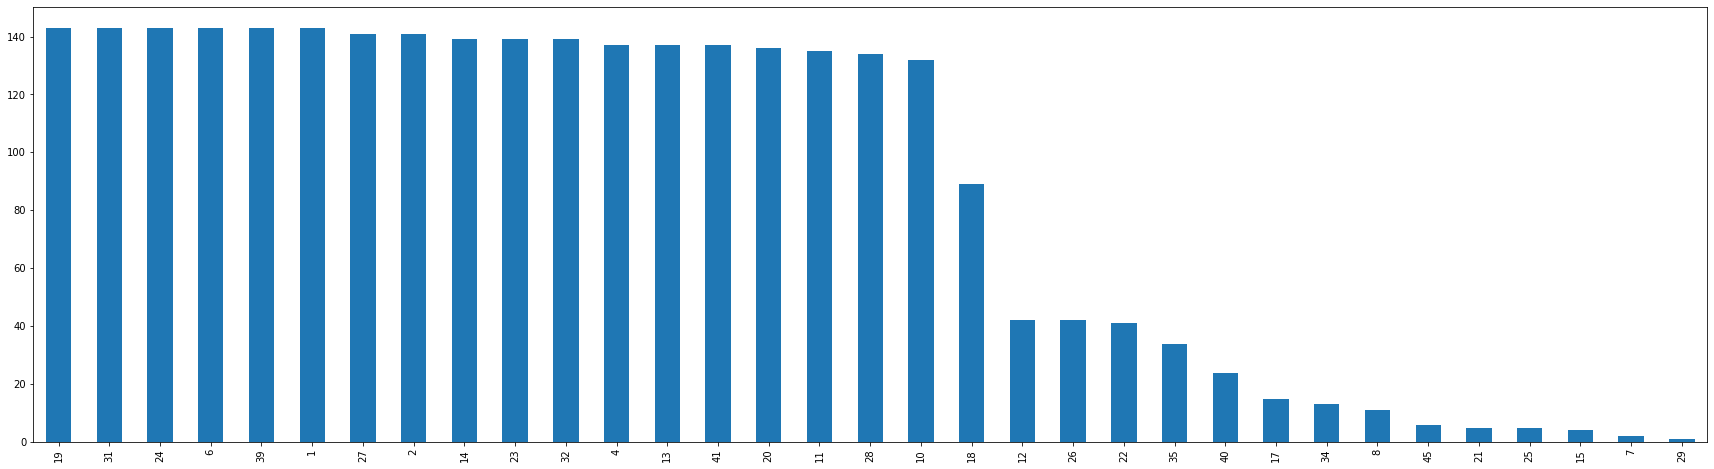

In [59]:
acima_lojas = df_clean[df_clean['Weekly_Sales']>media_sem].sort_values(by='Weekly_Sales', ascending=True)
display(acima_lojas.head())
# Qtd de semanas que cada loja ficou acima da média.
plt.figure(figsize=(30,8))
ax = acima_lojas.Store.value_counts().plot(kind='bar')

In [38]:
df_2010 = df_clean[(df_clean['Year'] == 2010)].reset_index()
df_2011 = df_clean[(df_clean['Year'] == 2011)].reset_index()
df_2012 = df_clean[(df_clean['Year'] == 2012)].reset_index()

In [39]:
faturamento_mes_2010 = df_2010[['Month','Weekly_Sales','Year','Holiday_Flag']].groupby(['Month']).agg('sum')

graf = px.bar(faturamento_mes_2010,
              y='Weekly_Sales',
              color='Holiday_Flag')

graf.update_layout(
    title='Faturamento de 2010 /mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Mês',
        titlefont_size=16,
        tickfont_size=14))

In [40]:
faturamento_mes_2011 = df_2011[['Month','Weekly_Sales','Year','Holiday_Flag']].groupby(['Month']).agg('sum').sort_values('Weekly_Sales')


graf = px.bar(faturamento_mes_2011,
              y='Weekly_Sales', 
              color='Holiday_Flag')

graf.update_layout(
    title='Faturamento de 2011 /mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Mês',
        titlefont_size=16,
        tickfont_size=14))

In [41]:
faturamento_mes_2012 = df_2012[['Month','Weekly_Sales','Year','Holiday_Flag']].groupby(['Month']).agg('sum')


graf = px.bar(faturamento_mes_2012,
              y='Weekly_Sales',
              color='Holiday_Flag')

graf.update_layout(
    title='Faturamento de 2012 /mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Mês',
        titlefont_size=16,
        tickfont_size=14))

In [42]:
faturamento_ano = df_clean[['Year', 'Weekly_Sales']].groupby(['Year']).agg('sum').reset_index()
faturamento_ano.rename(columns = {'Weekly_Sales': 'Soma_Anual'}, inplace=True)
faturamento_ano

,Year,Soma_Anual
0,2010,"2,221,633,053.25"
1,2011,"2,402,324,749.33"
2,2012,"1,941,748,776.75"


In [43]:
grafico = px.bar(faturamento_ano, x=["2010", "2011", "2012"], 
                 y='Soma_Anual' 
                               )


grafico.update_layout(
    title='Faturamento/mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Ano',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Valores em U$',
        titlefont_size=16,
        tickfont_size=14))
grafico.show()

In [44]:
holidays_mean = df_clean.groupby('Holiday_Flag').mean().reset_index()


px.bar(holidays_mean,
       x='Holiday_Flag',
       y='Weekly_Sales' )

# Cálculos finais e conclusões
  >
---



In [45]:
df_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,5


In [46]:
holidays = df_clean[df_clean['Holiday_Flag']==1].groupby(['Holiday_Flag', 'Store']).mean()
holidays.sort_values('Weekly_Sales', ascending=False).head(10)



Weekly_Sales  Temperature  Fuel_Price    CPI  \
Holiday_Flag Store                                                 
1            20     2,096,560.44        44.54        3.32 208.70   
             4      2,079,606.81        49.89        3.12 128.54   
             2      2,079,266.90        57.46        3.09 215.19   
             14     2,031,568.92        47.69        3.34 186.25   
             13     1,937,483.43        45.33        3.12 128.54   
             10     1,905,926.81        64.00        3.42 128.54   
             27     1,892,299.28        47.74        3.48 138.74   
             6      1,680,907.93        59.84        3.09 217.09   
             1      1,665,747.66        57.92        3.09 215.54   
             19     1,577,046.73        42.71        3.48 134.83   

                    Unemployment     Year  Month  
Holiday_Flag Store                                
1            20             7.39 2,010.88  10.38  
             4              6.14 2,010.88  10.38  
             2              7.71 2,010.80  10.50  
             14             8.64 2,010.89  10.44  
             13             7.08 2,010.88  10.38  
             10             8.44 2,010.88  10.38  
             27             8.00 2,010.80  10.50  
             6              6.69 2,010.80  10.50  
             1              7.73 2,010.80  10.50  
             19             8.00 2,010.80  10.50

In [50]:
holidays = df_clean.groupby(['Holiday_Flag', 'Store']).mean()
holidays.sort_values('Weekly_Sales', ascending=False).head(10)

Weekly_Sales  Temperature  Fuel_Price    CPI  \
Holiday_Flag Store                                                 
1            20     2,096,560.44        44.54        3.32 208.70   
             4      2,079,606.81        49.89        3.12 128.54   
             2      2,079,266.90        57.46        3.09 215.19   
0            20     2,056,650.40        57.26        3.43 209.13   
             4      2,049,599.77        63.91        3.23 128.70   
1            14     2,031,568.92        47.69        3.34 186.25   
0            14     1,983,411.27        59.12        3.43 186.35   
             13     1,958,934.91        55.24        3.31 128.70   
1            13     1,937,483.43        45.33        3.12 128.54   
             10     1,905,926.81        64.00        3.42 128.54   

                    Unemployment     Year  Month  
Holiday_Flag Store                                
1            20             7.39 2,010.88  10.38  
             4              6.14 2,010.88  10.38  
             2              7.71 2,010.80  10.50  
0            20             7.37 2,011.00   5.96  
             4              5.95 2,010.99   5.99  
1            14             8.64 2,010.89  10.44  
0            14             8.65 2,010.99   6.04  
             13             6.99 2,010.99   5.99  
1            13             7.08 2,010.88  10.38  
             10             8.44 2,010.88  10.38

In [48]:
df_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,5


In [49]:
lojas_top10

,Store,Média_Vendas,Soma_Vendas
0,20,"2,058,998.05","280,023,734.81"
1,4,"2,051,352.01","281,035,224.92"
2,14,"1,986,529.39","276,127,584.78"
3,13,"1,957,682.27","268,202,470.39"
4,2,"1,905,830.24","268,722,063.50"
5,10,"1,856,344.19","245,037,433.62"
6,27,"1,759,139.96","248,038,735.05"
7,6,"1,564,728.19","223,756,130.64"
8,1,"1,555,264.40","222,402,808.85"
9,39,"1,450,668.13","207,445,542.47"


# Respondendo aos questionamentos

* A Questão de Negócio:
  - Qual a minha meta?
    > Encontrar uma loja potencial para expansão
  - Como posso chegar?
    > Escolhendo 1 loja com melhor histórico de vendas dentro dos períodos de de feriados
* O Entendimento do Negócio:
  - Quais dados eu tenho disponível?
    > São diversos atributos da região de cada loja que foram que classificam as 45 lojas do Walmart de Janeiro de 2010 até Dezembro de 2012. Expressam dados gerais da loja como vendas semanais, preço do combustível, clima, taxa de inflação, taxa de desemprego e período de feriado/festas. 
  - Eles são relevantes para o problema?
    >  Quase todos os atributos neste caso são relevantes, principalmente aqueles que podemos associar com as vendas semanais, como a temperatura, preço do combustível e a taxa de desemprego. 
  - Eles me trazem uma solução direta?
    >  Eles me trazem diversas opções e noções, porém ainda não é possível escolher uma loja que possamos afirmar que a chance dele dar um valor X de lucro seja alta. Leva-se em consideração as lojas com maior resultado, apesar de 19 lojas estarem com vendas acima da média global dentre as 45.
  - Qual o meu setor ou range de negócio?
    >  No geral, o meu setor de negócio é o de varejo, especificamente as lojas comerciais da Walmart Inc nos Estados Unidos. Para tomada de decisão, ainda filtrei a minha escolha às 10 cidades que possuem mais registros de venda nesse período, sendo elas: '20', '04' ,'14'.
* A Coleta de Dados:
  - Os dados que eu tenho fazem sentido?
    >  Sim. Não existe nenhum valor ausente e não havia valors nulos. Foi possível encontrar valores médios, totais e estatísticos, apenas tratando o tipo de objeto em cada coluna.
  - Estão no formato que eu gostaria?
    >  Alguns dados precisaram ser formatados como no caso da Data e a formatação de valores em moeda.
  - O que mais eu consigo obter de informação destes dados?
    > Alguns dos insights aplicados no problema foi a quantidade de semanas que algumas lojas ficaram acima da média de vendas, tendo como referência o próprio volume de vendas de cada uma
* A Limpeza de Dados: 
- Data
    > A data veio num formato diferente do usual, portanto foi feito uma tratativa para limpar os dados.
  - Remoção de dados outliers e valores ausentes
    > O dataset não apresentava valores ausentes. Já a situação de outliers, foi utilizado o percentil de 99,5% de algumas colunas para filtrar os dados finais.
* A Exploração de Dados:
  - Visualização dos dados
    > É possível montar diversas visualizações de dados e análises, porém limitou-se a ver média de vendas semanais por loja, a distribuição de vendas das 10 cidades com mais imóveis.
  - Quais as minhas métricas essenciais
    > Para a escolha da melhor loja, foi considerado o total de vendas semanais juntamente com a maior média de vendas. 
  - Baseado nos dados, qual loja seria melhor para expandir seu tamanho.
    > Utilizando essas métricas da etapa anterior, o ideal é escolher lojas que apresentaram o maior volume total e médio de vendas ao longo do período.


# Insights


## Qual o preço médio de venda semanal por loja?

O preço médio por loja pode ser visualizado na célula:



In [76]:
# Preço Médio por loja
faturamento_medio = df_clean[['Store', 'Weekly_Sales']].groupby(['Store',]).agg('mean')
faturamento_medio
# grafico = px.bar(faturamento_medio,
#                  y='Weekly_Sales' 
#                                    )

# grafico.add_hline(y=media_sem, 
#                   line_color="green",
#                   annotation_text="Média de Vendas Período",
#                                     )

# grafico.add_hline(y=max_sem, 
#                   line_color="yellow",
#                   annotation_text="Máximo de Vendas Período"
#                   )

# grafico.add_hline(y=min_sem, 
#                   line_color="red",
#                   annotation_text="Mínimo de Vendas Período"
#                   )


# grafico.update_layout(
#     title='Média Faturamento/mês',
#     xaxis_tickfont_size=14,
#     xaxis=dict(
#         title='Loja',
#         titlefont_size=16,
#         tickfont_size=14),
#     yaxis=dict(
#         title='Vendas Semanais',
#         titlefont_size=16,
#         tickfont_size=14))


# grafico.show()

,Weekly_Sales
Store,
1,"1,555,264.40"
2,"1,905,830.24"
3,"402,091.88"
4,"2,051,352.01"
5,"318,011.81"
6,"1,564,728.19"
7,"570,617.31"
8,"908,866.68"
9,"543,403.14"


## Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)

>O atributo que mais teve sentido com a média de vendas foi "Holiday_Flag", que significa que tem uma influência direta com o aumento ou consolidação das vendas durante o período. É uma estratégia desenvolver eventos e campanhas durante o período de Feriados Comemorativos americanos focando em volume de vendas. Pode-se constatar uma correlação de 0.41:

In [54]:
#Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)
faturamento_total.corr()['Weekly_Sales'].abs().sort_values(ascending = False)

Weekly_Sales   1.00
Holiday_Flag   0.41
Unemployment   0.12
Fuel_Price     0.11
Month          0.09
CPI            0.06
Temperature    0.05
Year           0.04
Name: Weekly_Sales, dtype: float64

## Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

> A loja que teve maior somatório de volume de vendas semanais durante todo o período analisado foi a Loja nº 04 com U$ 281M. Apesar da Loja 20 ter a média superior. 
A loja 04 passou 71 semanas com valores superiores a média do periodo:

In [ ]:
# Número de semanas acima da média do período
df_maiorloja[df_maiorloja['Weekly_Sales']>media_loja4].count()

index           71
Store           71
Date            71
Weekly_Sales    71
Holiday_Flag    71
Temperature     71
Fuel_Price      71
CPI             71
Unemployment    71
Year            71
Month           71
dtype: int64

## Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

In [73]:
# Vendas semanais / Médio por loja

grafico = px.histogram(df_clean,
                 y='Weekly_Sales', 
                 x='Store', 
                 color='Holiday_Flag',
                 barmode = 'group',
                 histfunc='avg'
                  )
grafico.add_hline(y=media_sem, 
                  line_color="green",
                  annotation_text="Média de Vendas Período",
                  )

grafico.add_hline(y=max_sem, 
                  line_color="yellow",
                  annotation_text="Máximo de Vendas Período"
                  )

grafico.add_hline(y=min_sem, 
                  line_color="red",
                  annotation_text="Mínimo de Vendas Período"
                  )

grafico.update_layout(
    title='Média Faturamento/mês',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='Loja',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Vendas Semanais',
        titlefont_size=16,
        tickfont_size=14))


grafico.show()

## Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

>Pensando em uma expansão, eu escolheria a **Loja nº 20** pois foi a loja com a média média de vendas semanais no periodo de 2010, 2011 e 2012, além de ser uma das quais teve a maior venda acumulada (soma). <br>
Além de considerar os valores das vendas semanais, deve-se destacar também que foi a loja com maior influência dos períodos de Feriados. Quase todas as lojas tiveram resultados superiores nas vendas semanais quando estavam em períodos de "Holidays" e a Loja de 20 esteve lider tanto em períodos festivos (Holiday_Flag=1) quanto periodo não-festivos (Holiday_Flag=O). 